In [1]:
metafile="J1646-2142_coherent16.meta"

In [2]:
import ppalign as ppa
import numpy as np

In [3]:
outfile = "abc.port"
ppa.align_archives(metafile=metafile, initial_guess="300_coherent_GWB/J1646-2142_500_200_512_2.2aug2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM",
                   tscrunch=True, pscrunch=True, SNR_cutoff=0.0, outfile=outfile, niter=1, quiet=False)

# Initial guess is an initial guess for an average portrait. I used the highest SNR profile for this.
# In this case, J1646-2142f64avgport.port is the average portrait created from the data files listed in the
# metafile. "f64" denotes that the files have been scrunched to have 64 frequency channels

# It is important to note that bad channels zeroed in the GMRT data processing pipeline must be fully zapped
# before being run through this notebook. I created a very simple shell script to do this and f scrunch to 
# a given number of frequency channels. I have only had total functionality with 64 channels. Input files also
# must be in FITS format. The shell script requires PSRCHIVE tools to work.




Initial guess: 300_coherent_GWB/J1646-2142_500_200_512_2.2aug2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM.

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.2aug2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity

Doing iteration 1...
FITS file name: 300_coherent_GWB/J1646-2142_500_200_2048_2.27oct2k18.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM.

Reading data from 300_coherent_GWB/J1646-2142_500_200_2048_2.27oct2k18.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.951

In [4]:
import ppspline as pps
avgport = outfile
dp = pps.DataPortrait(avgport)
dp.normalize_portrait("prof")

# This initializes the portrait be modeled by the spline model later. It is normalized 
# by the average portrait created earlier, so as to clearly model any frequency-dependent
# profile evolution.



Reading data from abc.port on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 0.000000
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity



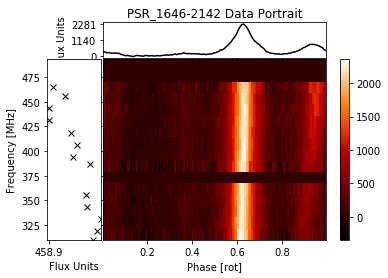

In [5]:
dp.show_data_portrait()

In [8]:
# Mainly set to defaults. SNR cutoffs removed
smooth = True
rchi2_tol = 0.1 #What is this factor
k = 5
sfac = 1.0
max_nbreak = 2

# Setting default arguments for the make_spline_model() seen below. It is important to set
# max_nbreak = None. Otherwise, the spline model will have many breakpoints and not accurately
# model the profile evolution.
dp.make_spline_model(smooth=smooth, rchi2_tol=rchi2_tol, k=k, sfac=sfac,
                    max_nbreak=max_nbreak, model_name=None, quiet=False, snr_cutoff=15.0)
# Creation of spline model. snr_cutoff is default to 150 but tweaking may be needed to
# get 1 - 2 "significant" eigenprofiles. Somewhat arbitrary.


Performing principal component analysis on data with 128 dimensions and 13 measurements...
B-spline interpolation model abc.port.spl uses 1 basis profile components and 2 breakpoints (6 B-splines with k=5).


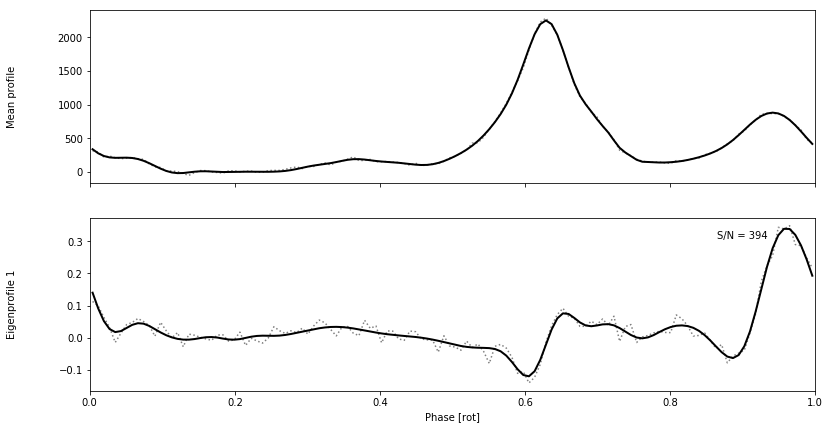

In [9]:
dp.show_eigenprofiles(show_snrs=True)
# Showing average profile and eigenprofile(s)


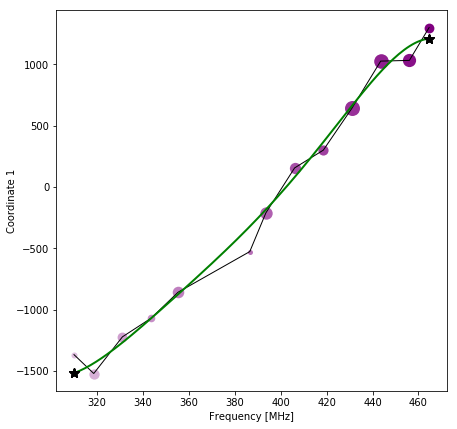

In [10]:
dp.show_spline_curve_projections()
# Shows a projection of how the eigenprofile(s) changes according to frequency and to each other.


In [11]:
J1646_fit_modelfile = "J1646-2142_splinefit.spl"
dp.write_model(J1646_fit_modelfile, quiet=False)

# Writes spline model to a file.


Wrote modelfile J1646-2142_splinefit.spl.



Reading data from 300_coherent_GWB/J1646-2142_500_200_2048_2.27oct2k18.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.9514
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_2048_2.27oct2k18.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM
~0.0232 sec/TOA
Med. TOA error is 3.217 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_2048_2.27oct2k18.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
       

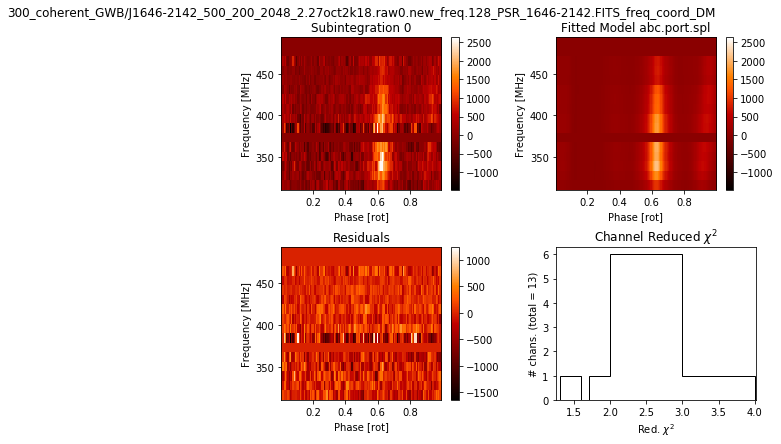


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.25feb2k19.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1499.63 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.25feb2k19.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM
~0.0266 sec/TOA
Med. TOA error is 2.281 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.25feb2k19.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        ce

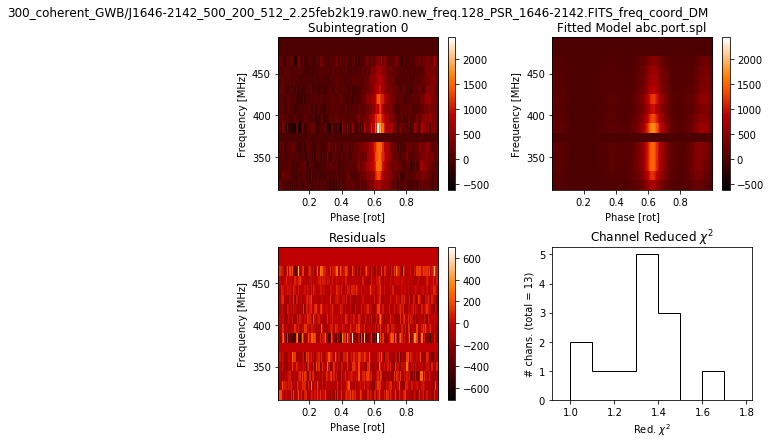


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.14may2k19.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.14may2k19.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM
~0.0246 sec/TOA
Med. TOA error is 2.897 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.14may2k19.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [

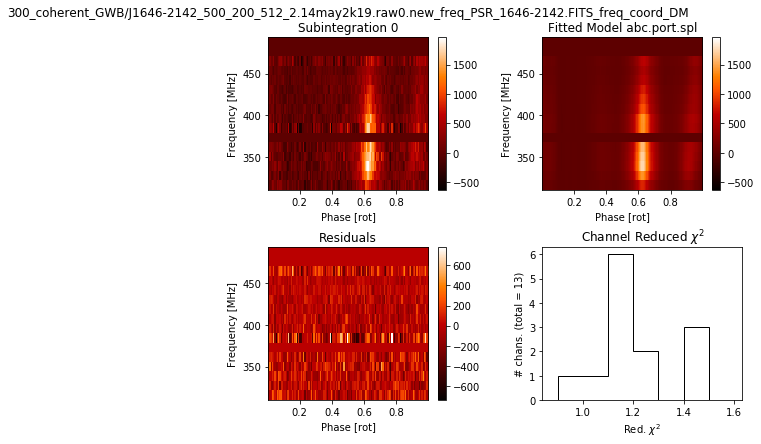


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.3jun2k19.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1798.96 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.3jun2k19.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM
~0.0173 sec/TOA
Med. TOA error is 5.120 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.3jun2k19.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz

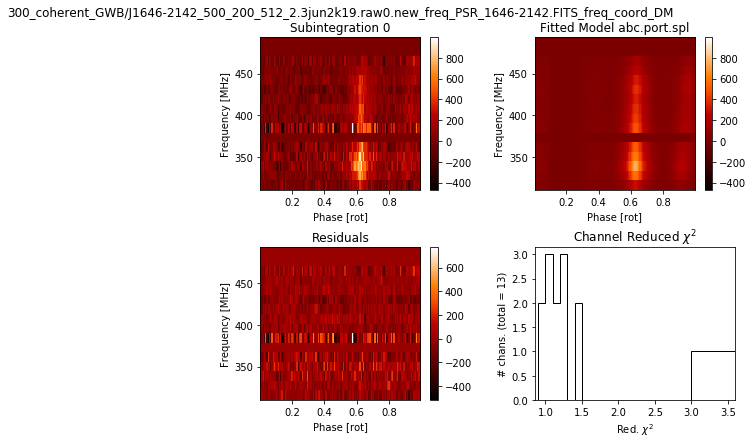


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.24jun2k19.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1070.53 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.24jun2k19.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM
~0.0231 sec/TOA
Med. TOA error is 2.994 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.24jun2k19.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [

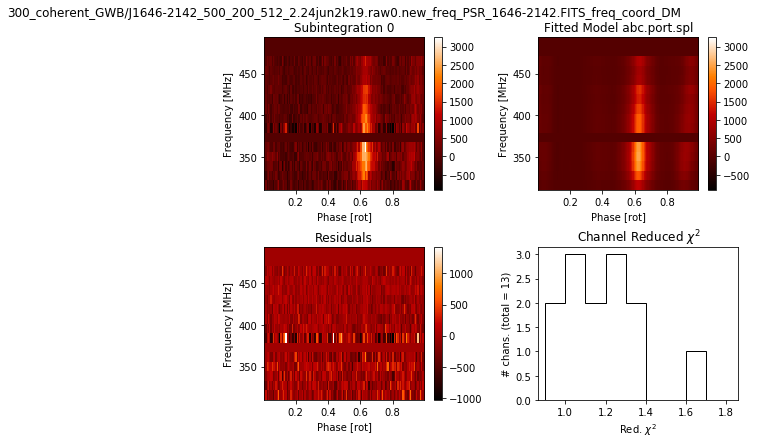


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.15jul2k19.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.15jul2k19.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM
~0.0255 sec/TOA
Med. TOA error is 2.200 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.15jul2k19.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [

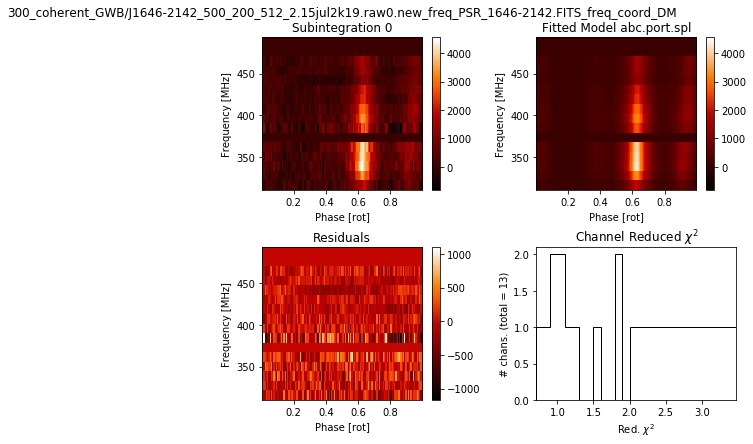


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.8aug2k19.raw0.new_freq2_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2152.86 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.8aug2k19.raw0.new_freq2_PSR_1646-2142.FITS_freq_coord_DM
~0.0098 sec/TOA
Med. TOA error is 5.382 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.8aug2k19.raw0.new_freq2_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.754855
        center freq. [

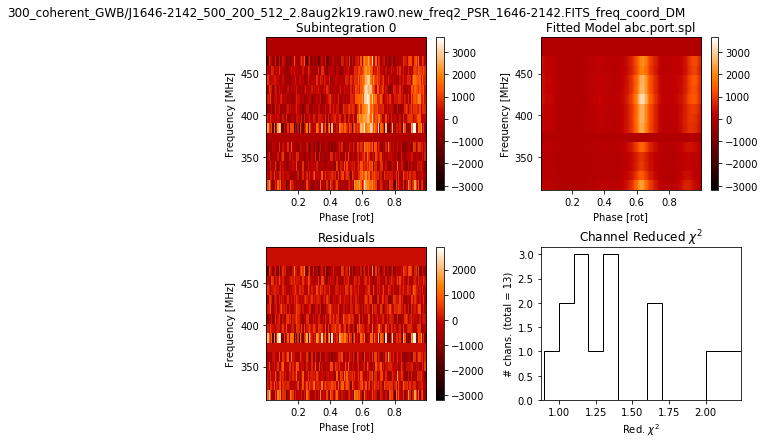


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.22aug2k19.raw0.new_freq2_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.22aug2k19.raw0.new_freq2_PSR_1646-2142.FITS_freq_coord_DM
~0.0189 sec/TOA
Med. TOA error is 2.336 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.22aug2k19.raw0.new_freq2_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.754855
        center freq

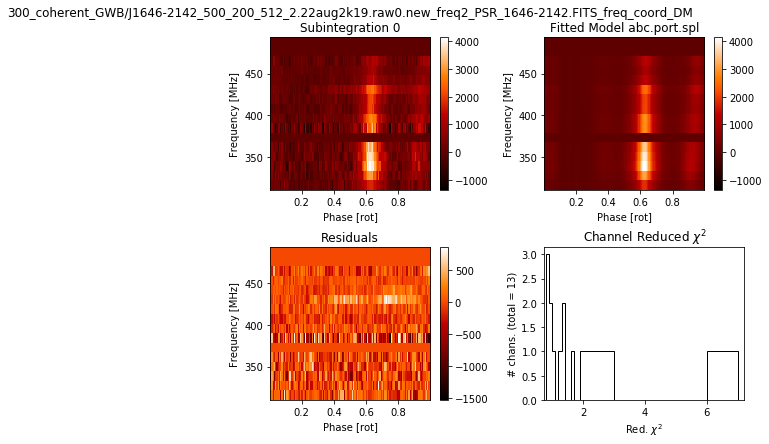


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.2sep2k19.raw0.new_freq2_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.2sep2k19.raw0.new_freq2_PSR_1646-2142.FITS_freq_coord_DM
~0.0156 sec/TOA
Med. TOA error is 2.836 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.2sep2k19.raw0.new_freq2_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.754855
        center freq. [

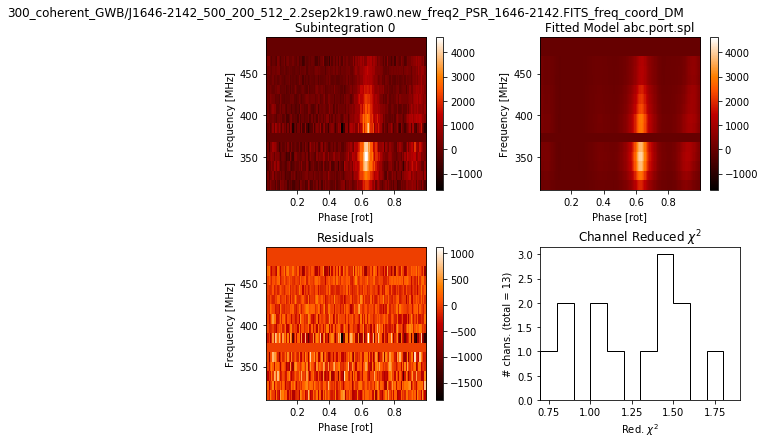


Reading data from 300_coherent_GWB/J1646-2142_500_200_1024_2.2mar2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.9011
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 3435.72 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_1024_2.2mar2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM
~0.0238 sec/TOA
Med. TOA error is 4.688 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_1024_2.2mar2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [

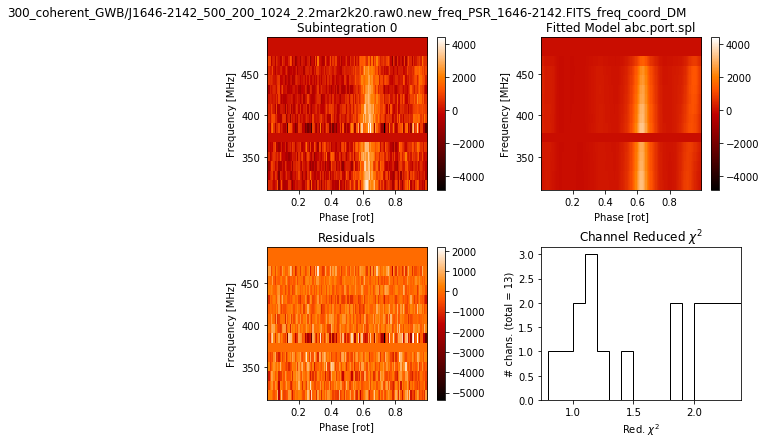


Reading data from 300_coherent_GWB/J1646-2142_500_200_1024_2.16jun2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.9011
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2607.02 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_1024_2.16jun2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM
~0.0117 sec/TOA
Med. TOA error is 6.637 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_1024_2.16jun2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq

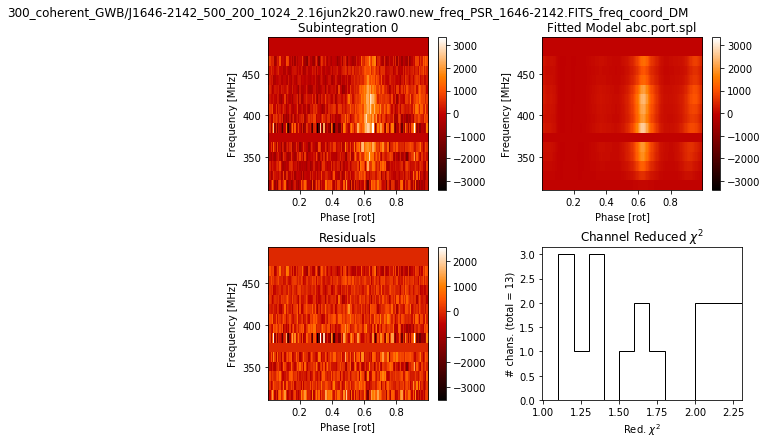


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.4aug2k20.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2999.26 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.4aug2k20.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM
~0.0099 sec/TOA
Med. TOA error is 6.013 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.4aug2k20.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.754855
        cente

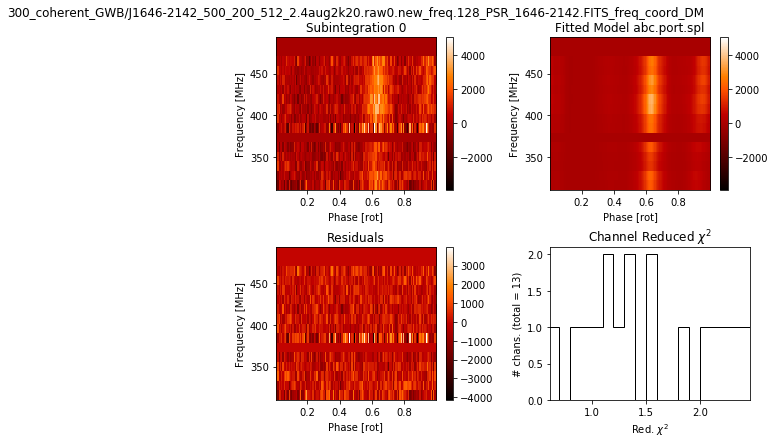


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.6nov2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.6nov2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM
~0.0206 sec/TOA
Med. TOA error is 4.531 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.6nov2k20.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz

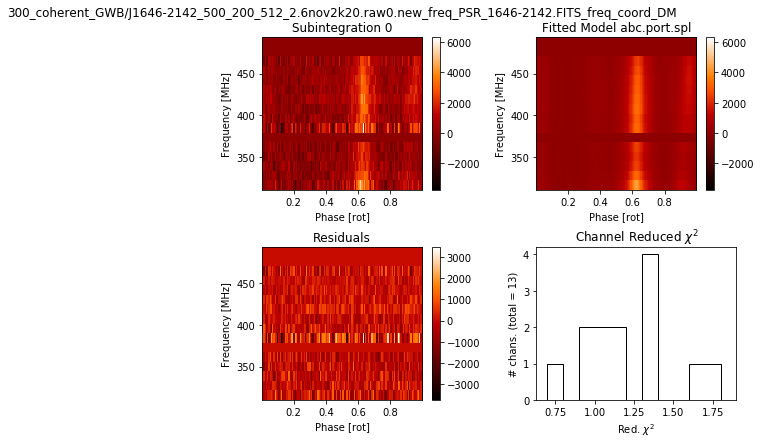


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.4jan2k21.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.4jan2k21.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM
~0.0217 sec/TOA
Med. TOA error is 3.045 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.4jan2k21.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz

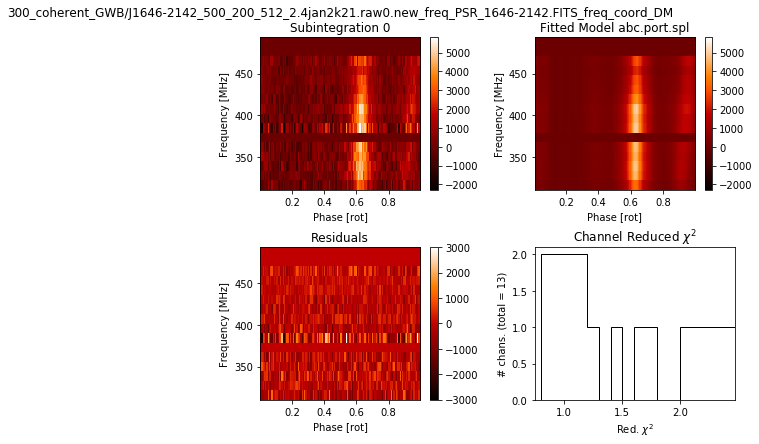


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.8feb2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2645.36 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.8feb2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM
~0.0271 sec/TOA
Med. TOA error is 2.569 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.8feb2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        cente

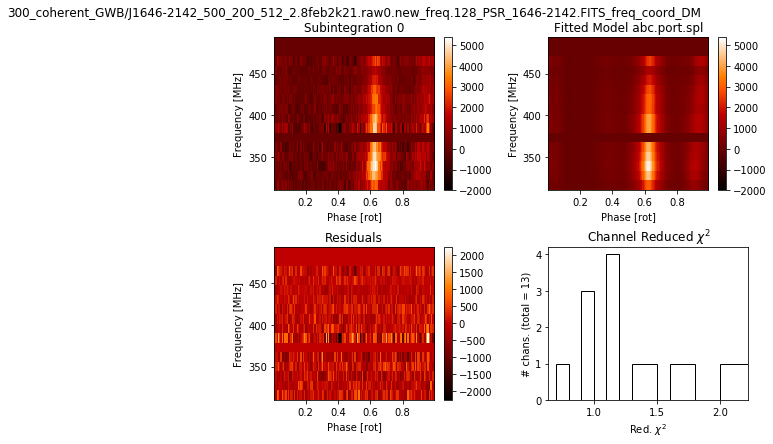


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.22mar2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.22mar2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM
~0.0233 sec/TOA
Med. TOA error is 3.477 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.22mar2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        ce

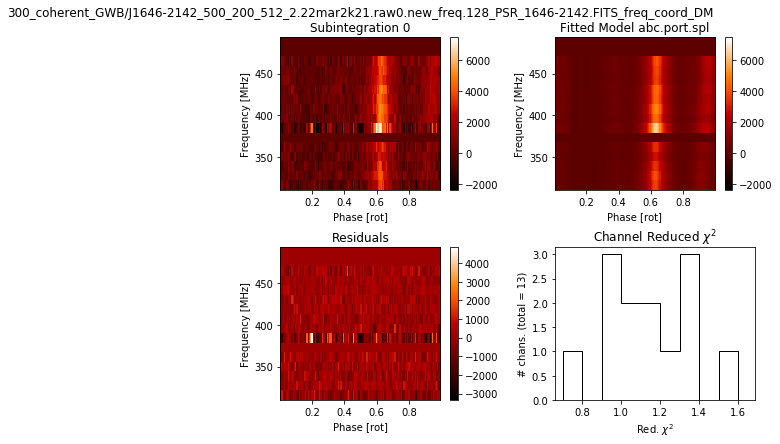


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.22may2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.22may2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM
~0.0171 sec/TOA
Med. TOA error is 1.915 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.22may2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        ce

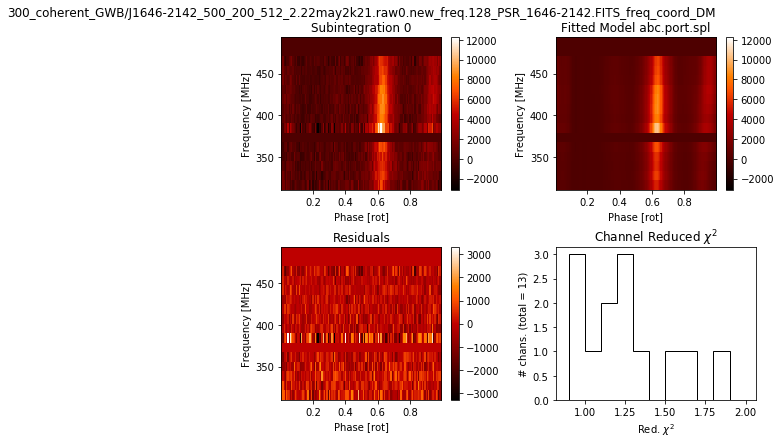


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM
~0.0082 sec/TOA
Med. TOA error is 6.120 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.31may2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        ce

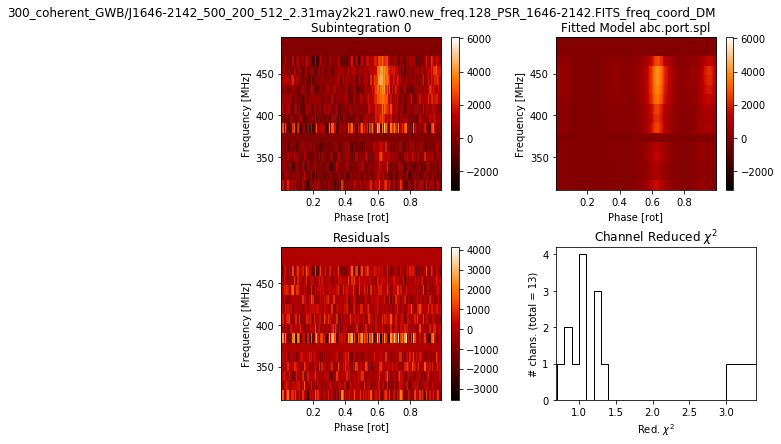


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.28jun2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.28jun2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM
~0.0120 sec/TOA
Med. TOA error is 3.956 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.28jun2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.853
        DM [cm**-3 pc]     = 29.754855
        ce

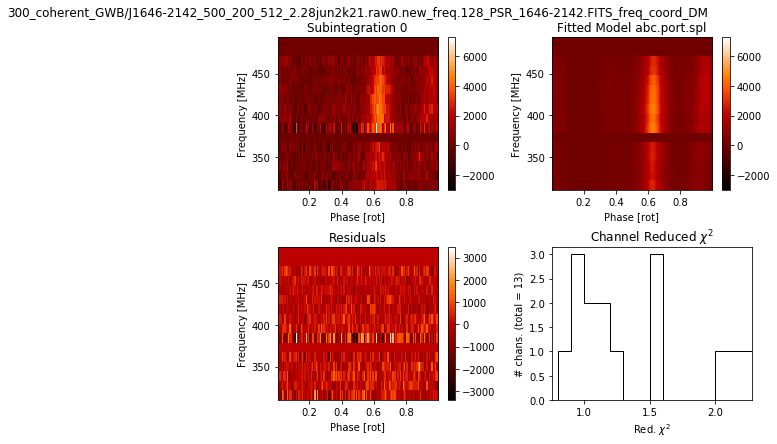


Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.2aug2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.754855
        center freq. [MHz] = 399.8047
        bandwidth [MHz]    = 200.0
        # bins in prof     = 128
        # channels         = 16
        # chan (mean)      = 13
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2699.92 s
Reading model from J1646-2142_splinefit.spl...
Fitting for TOA #1
--------------------------
300_coherent_GWB/J1646-2142_500_200_512_2.2aug2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM
~0.0204 sec/TOA
Med. TOA error is 3.000 us

Reading data from 300_coherent_GWB/J1646-2142_500_200_512_2.2aug2k21.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM on source PSR_1646-2142...
	P [ms]             = 5.854
        DM [cm**-3 pc]     = 29.754855
        cente

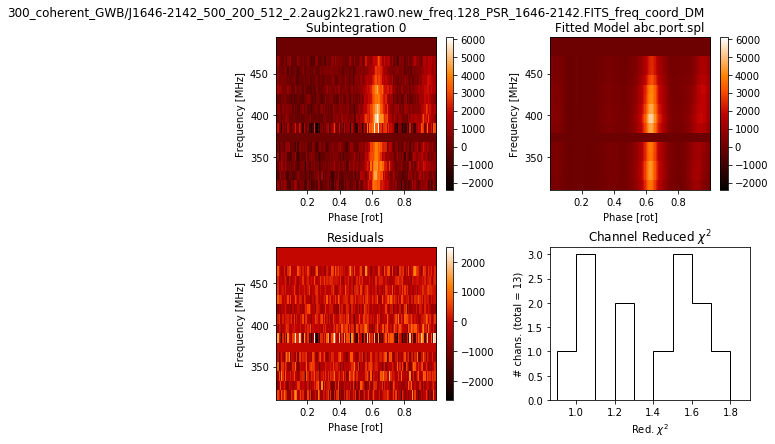

--------------------------
Total time: 0.68 sec, ~0.0342 sec/TOA


In [12]:
import pptoas as ppt
from pplib import write_TOAs
toaprogmeta = "J1646-2142_coherent16.meta"
gt = ppt.GetTOAs(toaprogmeta, J1646_fit_modelfile)
gt.get_TOAs( bary=True, show_plot=True)
#gt.get_narrowband_TOAs()
#pptoas.py -d "J1646-2142_coherent16.meta" -m "J1646-2142_splinefit.spl" --nu_ref=400

In [13]:
# TOAs produced. Can see number of TOAs produced per epoch as well as median TOA error for
# each epoch.
#gt.show_fit(datafile=None, isub=0)  # datafile=None will just select the first datafile from the metafile
timfile = "25Dec2k21_WB_C_J1646-2142_1eig.tim"
#timfile = "25Dec2k21_NB_C_J1646-2142.tim"
write_TOAs(gt.TOA_list, SNR_cutoff=0.0, outfile=timfile, append=False)

# Writing of TOAs to tim file. Writes in TEMPO format. Can copy paste "freq MJD uncert"
# information into another tim file.

In [14]:
fil = open('25Dec2k21_WB_C_J1646-2142_1eig.tim', 'r')
for line in fil:
    print  line#.split()[2], line.split()[3], line.split()[4], line.split()[5], line.split()[6], line.split()[7], line.split()[8]

300_coherent_GWB/J1646-2142_500_200_2048_2.27oct2k18.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM 370.09857994 58418.248921455337466   3.217  gmrt -pp_dm 29.7566497 -pp_dme 0.0004166 -be  -nchx 13 -tobs 1798.963 -f _ -gof 2.072 -snr 93.608 -fratio 1.499 -subint 0 -nch 16 -bw 154.687 -chbw 12.500 -fe  -nbin 128 -tmplt J1646-2142_splinefit.spl

300_coherent_GWB/J1646-2142_500_200_512_2.25feb2k19.raw0.new_freq.128_PSR_1646-2142.FITS_freq_coord_DM 382.35669076 58539.227643100983765   2.281  gmrt -pp_dm 29.7572512 -pp_dme 0.0003053 -be  -nchx 13 -tobs 1499.628 -f _ -gof 1.298 -snr 128.924 -fratio 1.499 -subint 0 -nch 16 -bw 154.687 -chbw 12.500 -fe  -nbin 128 -tmplt J1646-2142_splinefit.spl

300_coherent_GWB/J1646-2142_500_200_512_2.14may2k19.raw0.new_freq_PSR_1646-2142.FITS_freq_coord_DM 370.81686923 58616.910771167814026   2.897  gmrt -pp_dm 29.7574967 -pp_dme 0.0003941 -be  -nchx 13 -tobs 1798.963 -f _ -gof 1.181 -snr 103.375 -fratio 1.499 -subint 0 -nch 16 -bw 154.687 -chbw 12.500